In [1]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import logging
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rc('font',family='SimHei', size=13)
# os.chdir('')

In [11]:
data=pd.read_csv('pima-indians-diabetes.data.csv',names=list('abcdefgh')+['target'])

In [12]:
data.head()

,a,b,c,d,e,f,g,h,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
data.shape

(768, 9)

In [14]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test,y_train,y_test=train_test_split(data.iloc[:,:-1], data.iloc[:,-1],test_size=0.3)

In [21]:
X_train.shape

(537, 8)

In [22]:
y_train.shape

(537,)

In [23]:
import lightgbm as lgb

In [24]:
clf=lgb.LGBMClassifier()

In [27]:
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [28]:
y_prob=clf.predict_proba(X_test)

In [29]:
y_pred=clf.predict(X_test)

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr,threshold=roc_curve(y_test, y_prob[:,1])

In [36]:
fpr.shape

(80,)

In [37]:
tpr.shape

(80,)

In [43]:
threshold.max()

1.9913567388197877

In [44]:
threshold.min()

8.731072717717671e-05

In [67]:
auc_score=round(roc_auc_score(y_test,y_prob[:,1]), 3)

In [65]:
auc_score

0.7965432098765431

In [ ]:
def plot_roc(y_true, y_prob,filename):
    

### 需要优化调整的地方：
- 导入中文的字符
- 颜色选好看的颜色
- 调整字体大小

In [78]:

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [78]:

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [84]:
plt.style.use('ggplot')

In [105]:
params={
        'font.weight':'normal' #or 'blod'
        }
plt.rcParams.update(params)

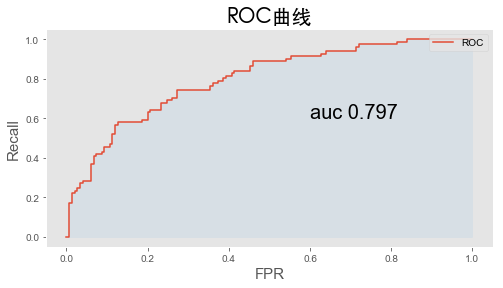

In [142]:
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc',size=10)


plt.rcParams['font.family']=['sans-serif']
# plt.rcParams['font.weight']=['blod']
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr,label='ROC')

plt.xlabel('FPR',fontsize=15)
plt.ylabel('Recall',fontsize=15)
plt.title('ROC曲线',fontproperties=font,fontsize=20)
plt.xticks(fontsize=10)
plt.grid(False)
plt.fill_between(fpr,tpr,0,color='#AED1E5',alpha=0.25)
plt.annotate(s='auc '+str(auc_score),xy=(0.6,0.6),fontsize=20)
plt.legend(loc='upper right')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_auc(y_true, y_prob, filename=False):
    fpr, tpr,threshold=roc_curve(y_true, y_prob)
    
    plt.rcParams['font.family']=['sans-serif']
    # plt.rcParams['font.weight']=['blod']
    plt.figure(figsize=(8,4))
    plt.plot(fpr, tpr,label='ROC')

    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('Recall',fontsize=15)
    plt.title('ROC曲线',fontproperties=font,fontsize=20)
    plt.xticks(fontsize=10)
    plt.grid(False)
    plt.fill_between(fpr,tpr,0,color='#AED1E5',alpha=0.25)
    plt.annotate(s='auc '+str(auc_score),xy=(0.6,0.6),fontsize=20)
    plt.legend(loc='upper right')
    
    if filename:
        plt.savefig(filename)

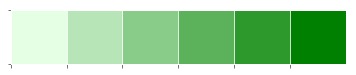

In [108]:
sns.palplot(sns.light_palette("green"))

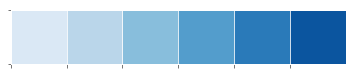

In [110]:
sns.palplot(sns.color_palette("Blues"))

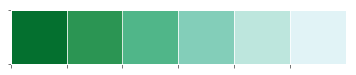

In [111]:
sns.palplot(sns.color_palette("BuGn_r"))

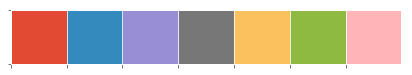

In [133]:
sns.palplot(sns.color_palette())

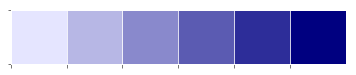

In [132]:
sns.palplot(sns.light_palette("navy"))

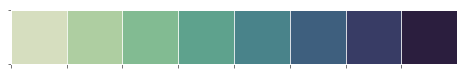

In [134]:
sns.palplot(sns.cubehelix_palette(8,start=.5,rot=-.75))
plt.show()

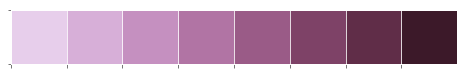

In [135]:
sns.palplot(sns.cubehelix_palette(8,start=.75,rot=-.150))
plt.show()

In [180]:
def plot_ks(y_true, y_prob, thresholds_num=1000, filename=False):
    
    thresholds = np.linspace(np.min(y_prob), np.max(y_prob), thresholds_num)
    def tpr_fpr_delta(threshold):
        y_pred = np.array([int(i>threshold) for i in y_prob])
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        tpr = tp / (tp+fn)
        fpr = fp / (fp+tn)
        delta = tpr - fpr
        return tpr, fpr, delta

    tprs, fprs, deltas = np.vectorize(tpr_fpr_delta)(thresholds)
    target_tpr = tprs[np.argmax(deltas)]
    target_fpr = fprs[np.argmax(deltas)]
    target_threshold = thresholds[np.argmax(deltas)]
    ks_value = np.max(deltas)
 
    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, tprs, label='TPR', color='r', linestyle='-', linewidth=1.5)    
    plt.legend(loc='upper right')
    plt.plot(thresholds, fprs, label='FPR', color='k', linestyle='-', linewidth=1.5)
    plt.legend(loc='upper right')
    plt.xlabel('Threshold', fontsize=10)
    plt.ylabel('TPR, FPR', fontsize=10)
    plt.annotate('KS Value : {:.3f}'.format(ks_value), xy=(target_threshold+0.01, 0.5*ks_value+0.3))
    plt.xticks()
    plt.title('KS Value')


    # Ҫ���ӵ������������
    x = [[target_threshold, target_threshold]] 
    y = [[target_fpr, target_tpr]]

    for i in range(len(x)):
        plt.plot(x[i], y[i], 'b--', lw=1.5)
        plt.scatter(x[i], y[i], c='b', s=15) # s���Ƶ�Ĵ�С
        plt.annotate('TPR : {:.3f}'.format(target_tpr), xy=([target_threshold, target_tpr]), xytext=(0.3, target_tpr),
                 arrowprops=dict(arrowstyle="<-", color='r')) 
        plt.annotate('FPR : {:.3f}'.format(target_fpr), xy=([target_threshold, target_fpr]), xytext=(0.2, target_fpr),
                 arrowprops=dict(arrowstyle="<-", color='k')) 
        if filename:
            plt.savefig(filename)
        plt.show()

In [186]:
from sklearn.metrics import confusion_matrix

def plot_ks(y_true, y_prob, thresholds_num=1000):
    def tpr_fpr_delta(y_true, y_prob, threshold):
        y_pred=[int(i>threshold) for i in y_prob]
        tn, fp, fn, tp=confusion_matrix(y_true, y_pred).ravel()
        fpr=fp/(fp+tn)
        tpr=tp/(fn+tp)
        delta=tpr-fpr
        return fpr, tpr, delta

    thresholds=np.linspace(0,1,thresholds_num)
    fprs=[]
    tprs=[]
    deltas=[]
    for thres in thresholds:
        fpr, tpr, delta=tpr_fpr_delta(y_test, y_prob, thres)
        fprs.append(fpr)
        tprs.append(tpr)
        deltas.append(delta)

    max_delta_idx=np.argmax(np.array(deltas))
    ks_value=np.max(deltas)

    target_fpr=fprs[max_delta_idx]
    target_tpr=tprs[max_delta_idx]
    target_threshold=thresholds[max_delta_idx]

    x=[target_threshold, target_threshold]
    y=[target_fpr, target_tpr]

    plt.figure(figsize=(8,4))
    for i in range(len(x)):    
        plt.scatter(x[i], y[i],color='blue',s=20)

    plt.plot([x[0],y[0]],[x[1],y[1]], linestyle='--' )

    plt.plot(thresholds, tprs, label='TPR',color='r')
    plt.plot(thresholds, fprs, label='FPR',color='b')
    plt.plot(thresholds, deltas, label='KS',color='y')


    plt.annotate(s='TPR: {:.3f}'.format(target_tpr),xy=(target_threshold, target_tpr),xytext=(target_threshold, target_tpr+0.05), arrowprops=dict(arrowstyle='<-',color='k'), fontsize=15)
    plt.annotate(s='FPR: {:.3f}'.format(target_fpr),xy=(target_threshold, target_fpr),xytext=(target_threshold-0.1, target_fpr-0.1), arrowprops=dict(arrowstyle='<-',color='k'),fontsize=15)

    plt.annotate(s='KS: {:.3f}'.format(ks_value),xy=(target_threshold-0.1, ks_value+0.05), fontsize=15)

    plt.legend(loc='upper right') 

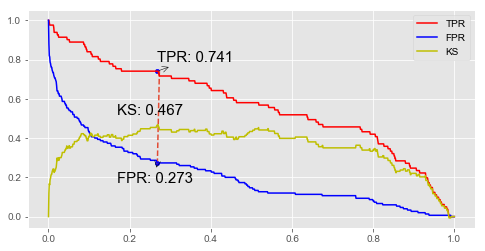

In [187]:
plot_ks(y_test,y_prob[:,1])

In [210]:
def plot_distribution(score,label):
    score_distribution=pd.DataFrame(dict(label=label,score=score))

    sns.distplot(score_distribution.query("label==1")['score'],color='r',label='bad')
    sns.distplot(score_distribution.query("label==0")['score'],color='g',label='good')
    
    plt.legend(loc='upper right')
    

In [ ]:
plot_distribution(sco)

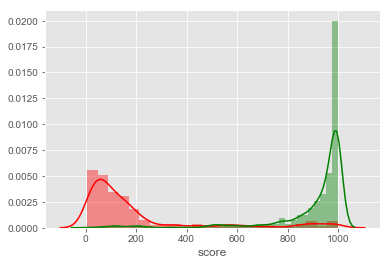

In [207]:
total_score=clf.predict_proba(data.iloc[:, :-1])[:, 0]*1000
total_label=data.iloc[:,-1]

score_distribution=pd.DataFrame(dict(label=total_label,score=total_score))

sns.distplot(score_distribution.query("label==1")['score'],color='r')
sns.distplot(score_distribution.query("label==0")['score'],color='g')